In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('Partner_Data_For_Forecast.csv')
df.head()

,Date,Source Name,Website Property,Partner,Seat Used by (Partner),Tag Type (Partner),Device Platform,Billed Impressions,Revenue,eCPM,Currency (Partner)
0,9/1/2019,3rd Party Combined Source - by Website and Device,Legacy,Rubicon,A9 S2S,A9 S2S,Desktop,"188,198",$450.05,$2.39,USD
1,9/1/2019,3rd Party Combined Source - by Website and Device,Legacy,AppNexus,Legacy,A9 S2S,Unknown (use A9 distribution),"366,002",$796.32,$2.18,USD
2,9/1/2019,3rd Party Combined Source - by Website and Device,Legacy,Pubmatic via EB,Legacy,Exchange Bidding on AMP,Desktop,460,$0.72,$1.57,USD
3,9/1/2019,3rd Party Combined Source - by Website and Device,Legacy,Rubicon,Legacy,Header Bidding via IX,Desktop,"152,486",$309.43,$2.03,USD
4,9/1/2019,3rd Party Combined Source - by Website and Device,Legacy,Amazon A9,Beamly: US,A9 S2S,Mobile,0,$0.00,NaN,USD


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['MonthYear'] = df['Date'].dt.to_period('m')
df

,Date,Source Name,Website Property,Partner,Seat Used by (Partner),Tag Type (Partner),Device Platform,Billed Impressions,Revenue,eCPM,Currency (Partner),MonthYear
0,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Rubicon,A9 S2S,A9 S2S,Desktop,"188,198",$450.05,$2.39,USD,2019-09
1,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,AppNexus,Legacy,A9 S2S,Unknown (use A9 distribution),"366,002",$796.32,$2.18,USD,2019-09
2,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Pubmatic via EB,Legacy,Exchange Bidding on AMP,Desktop,460,$0.72,$1.57,USD,2019-09
3,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Rubicon,Legacy,Header Bidding via IX,Desktop,"152,486",$309.43,$2.03,USD,2019-09
4,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Amazon A9,Beamly: US,A9 S2S,Mobile,0,$0.00,NaN,USD,2019-09
5,2019-09-01,3rd Party Combined Source - by Website and Device,Tributes,Index Exchange,Sortable,Header Bidding via Sortable,Mobile,"10,327",$21.61,$2.09,USD,2019-09
6,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Facebook Audience Network,Legacy,Header Bidding via IX,Mobile,"212,769",$428.51,$2.01,USD,2019-09
7,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Sovrn,Legacy,Header Bidding via IX,Desktop,"434,320",$807.80,$1.86,USD,2019-09
8,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Index Exchange via EB,Legacy,Exchange Bidding,Desktop,"352,870",$508.97,$1.44,USD,2019-09
9,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Carambola,Legacy,Traditional Tag,Desktop,"237,293",$123.65,$0.52,USD,2019-09


In [5]:
df = df.reset_index()

In [6]:
#df_forecast = df.groupby(["MonthYear"]).sum()["Revenue"]

In [7]:
df.rename(columns = {'Date':'ds'}, inplace = True)

In [8]:
df.head()

,index,ds,Source Name,Website Property,Partner,Seat Used by (Partner),Tag Type (Partner),Device Platform,Billed Impressions,Revenue,eCPM,Currency (Partner),MonthYear
0,0,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Rubicon,A9 S2S,A9 S2S,Desktop,"188,198",$450.05,$2.39,USD,2019-09
1,1,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,AppNexus,Legacy,A9 S2S,Unknown (use A9 distribution),"366,002",$796.32,$2.18,USD,2019-09
2,2,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Pubmatic via EB,Legacy,Exchange Bidding on AMP,Desktop,460,$0.72,$1.57,USD,2019-09
3,3,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Rubicon,Legacy,Header Bidding via IX,Desktop,"152,486",$309.43,$2.03,USD,2019-09
4,4,2019-09-01,3rd Party Combined Source - by Website and Device,Legacy,Amazon A9,Beamly: US,A9 S2S,Mobile,0,$0.00,NaN,USD,2019-09


In [9]:
df.rename(columns = {'Revenue':'y'}, inplace = True)

In [10]:
dff = df.filter(items=['ds','y'])
dff.head()

,ds,y
0,2019-09-01,$450.05
1,2019-09-01,$796.32
2,2019-09-01,$0.72
3,2019-09-01,$309.43
4,2019-09-01,$0.00


In [11]:
dff.dtypes

ds    datetime64[ns]
y             object
dtype: object

In [12]:
dff['y'] = dff['y'].str.replace('$', '')

In [18]:
dff['y'] = dff['y'].astype(float)

In [21]:
dff['MonthYear'] = dff['ds'].dt.to_period('m')

In [22]:
df_forecast = dff.groupby(["MonthYear"]).sum()["y"]

In [23]:
df_forecast

MonthYear
2019-06    1146865.57
2019-07    1124934.43
2019-08    1081704.76
2019-09      23999.07
Freq: M, Name: y, dtype: float64

In [24]:
#dff['y'] = dff['y'].str.replace(',', '')

In [25]:
black_friday = pd.DataFrame({
  'holiday': 'black-friday',
  'ds': pd.to_datetime(['2017-11-24', '2018-11-23', '2019-11-29',
                        '2020-11-27']),
  'lower_window': 0,
  'upper_window': 2,
})

cyber_monday = pd.DataFrame({
  'holiday': 'cyber_monday',
  'ds': pd.to_datetime(['2017-11-27', '2018-11-26', '2019-12-02',
                        '2020-11-30']),
  'lower_window': 0,
  'upper_window': 3,
})

holidays = pd.concat((black_friday, cyber_monday))

In [26]:
m = Prophet(holidays = holidays,
            yearly_seasonality=True,
            daily_seasonality=True,
            weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(dff)
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)



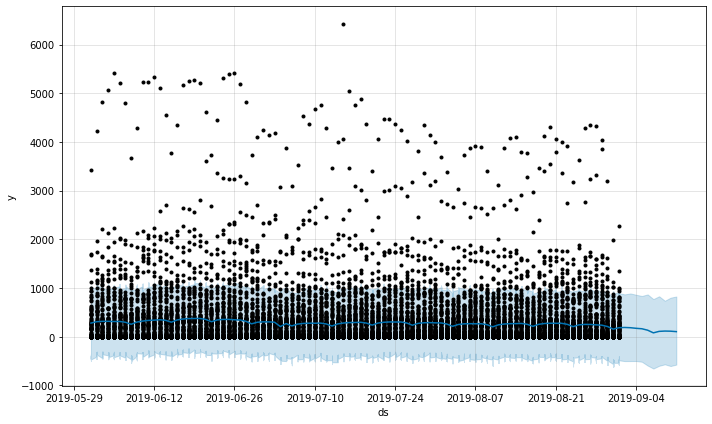

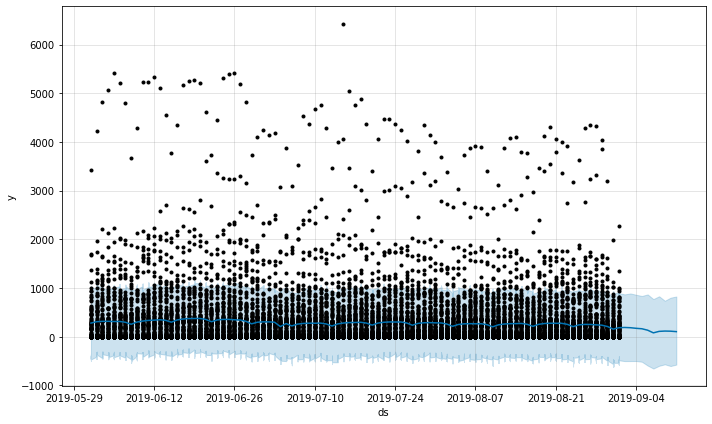

In [27]:
fig = m.plot(forecast)
fig